In [2]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime
import plotly.express as px

In [2]:
!wc -l cleo_user_activity.csv

 5008958 cleo_user_activity.csv


In [3]:
!wc -l cleo_users.csv

  251821 cleo_users.csv


# Create Postgres database

In [40]:
engine = create_engine("postgres://postgres@/postgres")

In [39]:
conn = engine.connect()
conn.execute("commit")

In [14]:
conn.execute("create database cleo")
conn.close()

# Store csv in DB

In [3]:
engine = create_engine("postgres://postgres@/cleo", echo=False)

In [4]:
connection = engine.raw_connection()
cursor = connection.cursor()

In [22]:
raw_activity = pd.read_csv('cleo_user_activity.csv')
raw_activity.head()

,user_id,active_date
0,855854,2019-01-01
1,855854,2019-01-02
2,855854,2019-01-05
3,855854,2019-01-12
4,855854,2019-01-22


In [18]:
raw_activity.dtypes

user_id         int64
active_date    object
dtype: object

In [ ]:
# conn.execute("drop table raw_activity")
# conn.execute("commit")

In [ ]:
raw_activity.to_sql('raw_activity', con = engine, index = False)

In [48]:
pd.read_sql("select * from raw_activity limit 5", con = engine)

,user_id,active_date
0,855854,2019-01-01
1,855854,2019-01-02
2,855854,2019-01-05
3,855854,2019-01-12
4,855854,2019-01-22


In [49]:
pd.read_sql("select count(*) from raw_activity limit 5", con = engine)

,count
0,5008957


In [21]:
raw_users = pd.read_csv('cleo_users.csv')
raw_users.head()

/Users/csabi/.pyenv/versions/miniconda3-4.7.12/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,created_at,user_country,age,campaign_source,device,budget_created_at,autosave_created_at,subscription_created_at
0,856843,2019-01-01,GB,50,Influencer,messenger,NaN,NaN,2019-03-01
1,857774,2019-01-01,GB,34,Facebook Ads: General,messenger,NaN,NaN,2019-04-08
2,859512,2019-01-02,GB,26,Influencer,messenger,2019-07-02,NaN,2019-07-02
3,861357,2019-01-02,US,33,Influencer,ios,2019-01-02,NaN,2019-05-30
4,862830,2019-01-03,US,46,Facebook Ads: General,android,2019-01-03,2019-01-17,2019-02-20


In [23]:
raw_users.to_sql('raw_users', con = engine, index = False)

In [47]:
engine.table_names()

['raw_activity', 'raw_users']

In [50]:
pd.read_sql("select * from raw_users limit 5", con = engine)

,id,created_at,user_country,age,campaign_source,device,budget_created_at,autosave_created_at,subscription_created_at
0,856843,2019-01-01,GB,50,Influencer,messenger,None,None,2019-03-01
1,857774,2019-01-01,GB,34,Facebook Ads: General,messenger,None,None,2019-04-08
2,859512,2019-01-02,GB,26,Influencer,messenger,2019-07-02,None,2019-07-02
3,861357,2019-01-02,US,33,Influencer,ios,2019-01-02,None,2019-05-30
4,862830,2019-01-03,US,46,Facebook Ads: General,android,2019-01-03,2019-01-17,2019-02-20


In [51]:
pd.read_sql("select count(*) from raw_users where budget_created_at is null limit 5", con = engine)

,count
0,152331


In [52]:
pd.read_sql("select count(*) from raw_users limit 5", con = engine)

,count
0,251820


In [26]:
pd.read_sql("""
    select *
    from information_schema.columns
    where table_name = 'raw_users'
""", con = engine)

,table_catalog,table_schema,table_name,column_name,ordinal_position,column_default,is_nullable,data_type,character_maximum_length,character_octet_length,...,is_identity,identity_generation,identity_start,identity_increment,identity_maximum,identity_minimum,identity_cycle,is_generated,generation_expression,is_updatable
0,cleo,public,raw_users,id,1,None,YES,bigint,None,NaN,...,NO,None,None,None,None,None,NO,NEVER,None,YES
1,cleo,public,raw_users,created_at,2,None,YES,text,None,1.073742e+09,...,NO,None,None,None,None,None,NO,NEVER,None,YES
2,cleo,public,raw_users,user_country,3,None,YES,text,None,1.073742e+09,...,NO,None,None,None,None,None,NO,NEVER,None,YES
3,cleo,public,raw_users,age,4,None,YES,bigint,None,NaN,...,NO,None,None,None,None,None,NO,NEVER,None,YES
4,cleo,public,raw_users,campaign_source,5,None,YES,text,None,1.073742e+09,...,NO,None,None,None,None,None,NO,NEVER,None,YES
5,cleo,public,raw_users,device,6,None,YES,text,None,1.073742e+09,...,NO,None,None,None,None,None,NO,NEVER,None,YES
6,cleo,public,raw_users,budget_created_at,7,None,YES,text,None,1.073742e+09,...,NO,None,None,None,None,None,NO,NEVER,None,YES
7,cleo,public,raw_users,autosave_created_at,8,None,YES,text,None,1.073742e+09,...,NO,None,None,None,None,None,NO,NEVER,None,YES
8,cleo,public,raw_users,subscription_created_at,9,None,YES,text,None,1.073742e+09,...,NO,None,None,None,None,None,NO,NEVER,None,YES


# Understand user base

In [9]:
pd.read_sql("select * from raw_users limit 5", con = engine)

,id,created_at,user_country,age,campaign_source,device,budget_created_at,autosave_created_at,subscription_created_at
0,856843,2019-01-01,GB,50,Influencer,messenger,None,None,2019-03-01
1,857774,2019-01-01,GB,34,Facebook Ads: General,messenger,None,None,2019-04-08
2,859512,2019-01-02,GB,26,Influencer,messenger,2019-07-02,None,2019-07-02
3,861357,2019-01-02,US,33,Influencer,ios,2019-01-02,None,2019-05-30
4,862830,2019-01-03,US,46,Facebook Ads: General,android,2019-01-03,2019-01-17,2019-02-20


## Install counts, countries

In [11]:
pd.read_sql("select user_country, count(*), count(distinct id) as cnt from raw_users group by 1", con = engine)

,user_country,count,cnt
0,GB,24343,24343
1,US,227477,227474


In [275]:
install_dates = pd.read_sql("select created_at, user_country, count(*) as cnt from raw_users group by 1,2", con = engine)

In [8]:
install_dates.pivot(index='created_at', columns = 'user_country', values = 'cnt')

user_country,GB,US
created_at,,
2019-01-01,127,345
2019-01-02,173,427
2019-01-03,181,397
2019-01-04,174,328
2019-01-05,171,261
...,...,...
2019-08-27,32,1554
2019-08-28,28,1770
2019-08-29,19,1421


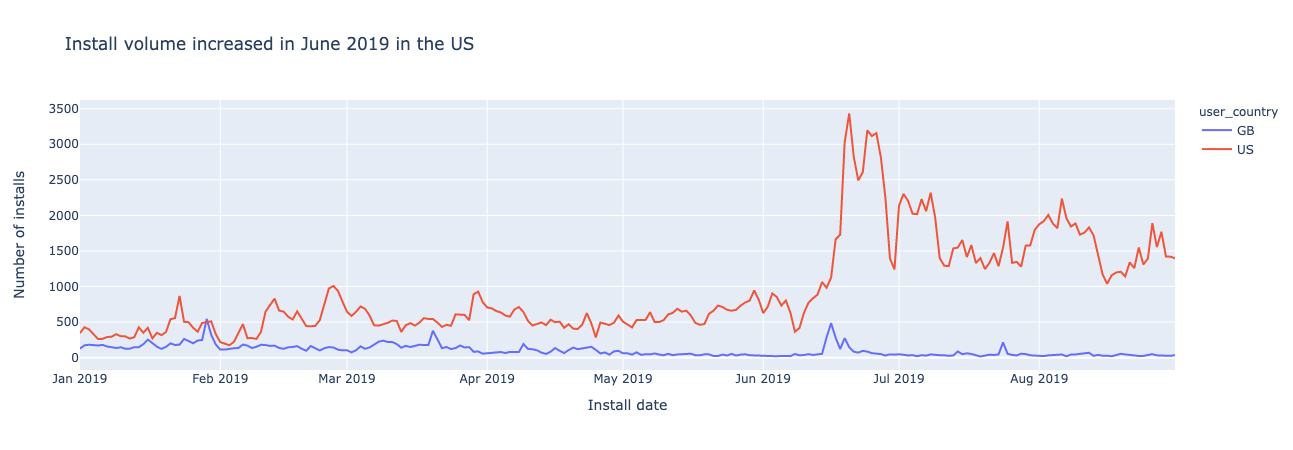

In [204]:
(
    px
    .line(install_dates, x='created_at', y='cnt', color='user_country', title = 'Install volume increased in June 2019 in the US')
    .update_yaxes(title = 'Number of installs')
    .update_xaxes(title = 'Install date')
)

## Device / platform

In [13]:
pd.read_sql("select device, count(*) as cnt from raw_users where user_country = 'GB' group by 1", con = engine)

,device,cnt
0,android,2452
1,ios,6555
2,messenger,15336


## Install source / campaign

In [210]:
gb_source = pd.read_sql("select campaign_source, count(*) as cnt from raw_users where user_country = 'GB' group by 1", con = engine)
gb_source

,campaign_source,cnt
0,Facebook Ads: General,4879
1,Facebook Ads: Overdraft Fees,1440
2,Friend Referral,6791
3,Influencer,11233


In [221]:
gb_source.set_index('campaign_source').sort_values(by='campaign_source').T

campaign_source,Facebook Ads: General,Facebook Ads: Overdraft Fees,Friend Referral,Influencer
cnt,4879,1440,6791,11233


## Conversion metrics

In [265]:
global_campaign_dt = pd.read_sql("select created_at, campaign_source, count(*) as cnt from raw_users group by 1,2", con = engine)

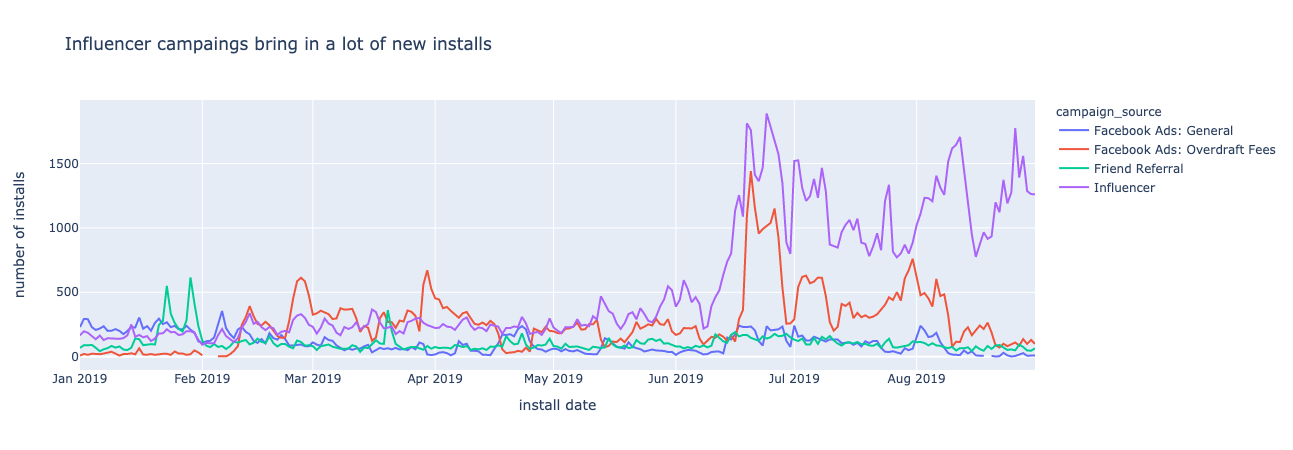

In [266]:
(
    px
    .line(global_campaign_dt.pivot(index='created_at', columns='campaign_source', values='cnt'),
          title = 'Influencer campaings bring in a lot of new installs')
    .update_yaxes(title = 'number of installs')
    .update_xaxes(title = 'install date')
)

In [267]:
global_counts = pd.read_sql("""
    select 
          campaign_source
        , count(*) as cnt 
        , count(budget_created_at) as budget_cnt	
        , count(autosave_created_at) as autosave_cnt	
        , count(subscription_created_at) as subscription_cnt
    from raw_users 
    group by 1
""", con = engine)
global_counts

,campaign_source,cnt,budget_cnt,autosave_cnt,subscription_cnt
0,Facebook Ads: General,26185,15093,2795,1607
1,Facebook Ads: Overdraft Fees,64997,20050,3454,13512
2,Friend Referral,25599,5172,1120,1069
3,Influencer,135039,59174,11164,22283


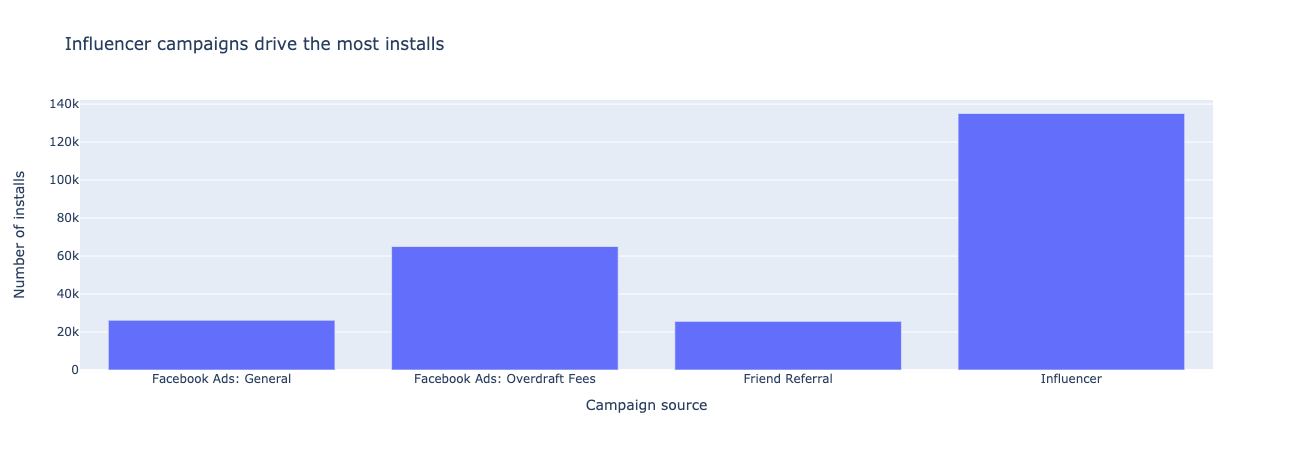

In [273]:
px.bar(global_counts, x='campaign_source', y='cnt', title = 'Influencer campaigns drive the most installs').update_xaxes(title = 'Campaign source').update_yaxes(title = 'Number of installs')

In [269]:
global_pct = (
    global_counts
    .assign(budget_created = lambda x: x.budget_cnt / x.cnt,
            autosave_created = lambda x: x.autosave_cnt / x.cnt,
            subscription_created = lambda x: x.subscription_cnt / x.cnt)
)
global_pct

,campaign_source,cnt,budget_cnt,autosave_cnt,subscription_cnt,budget_created,autosave_created,subscription_created
0,Facebook Ads: General,26185,15093,2795,1607,0.576399,0.106741,0.061371
1,Facebook Ads: Overdraft Fees,64997,20050,3454,13512,0.308476,0.053141,0.207887
2,Friend Referral,25599,5172,1120,1069,0.202039,0.043752,0.041759
3,Influencer,135039,59174,11164,22283,0.438199,0.082672,0.165012


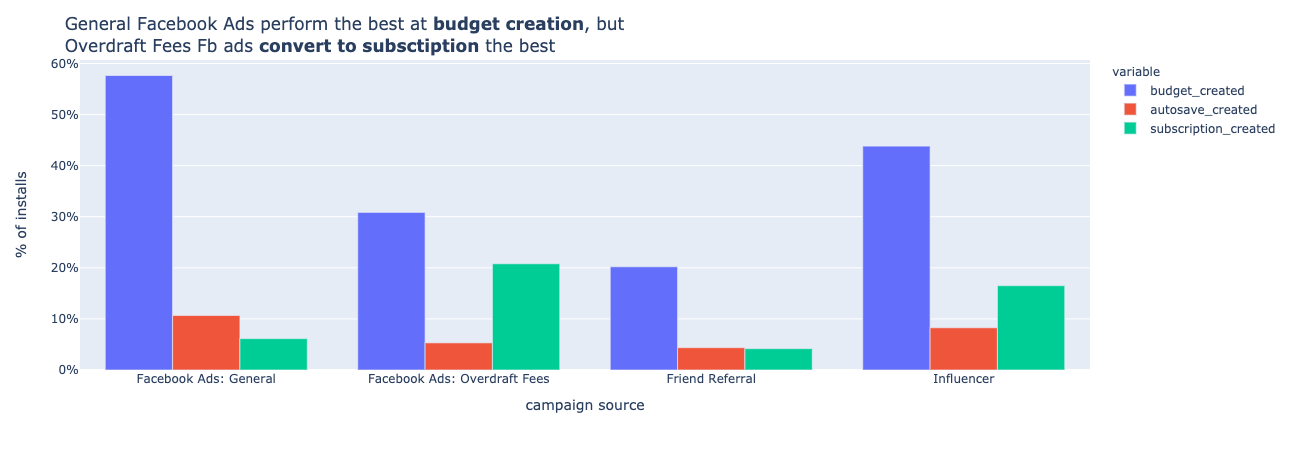

In [270]:
(
    px
    .bar(global_pct, x='campaign_source', y=['budget_created', 'autosave_created', 'subscription_created'], barmode = 'group')
    .update_yaxes(tickformat='%a', title = '% of installs')
    .update_xaxes(title = 'campaign source')
    .update_layout(title = 'General Facebook Ads perform the best at <b>budget creation</b>, but <br>Overdraft Fees Fb ads <b>convert to subsctiption</b> the best')
)

## Time to convert

In [195]:
pd.read_sql("""    
    select weeks_until_budget_created, count(*) as user_cnt
    from (
        select 
              raw_users.id
            , cast(DATE_PART('day', budget_created_at::timestamp - created_at::timestamp) / 7 as int) + 1 as weeks_until_budget_created
        from raw_users
        where budget_created_at is not null
    ) t
    group by 1
    order by 1
""", con = engine).head(20)

,weeks_until_budget_created,user_cnt
0,1,65778
1,2,6755
2,3,3837
3,4,2440
4,5,2063
5,6,1545
6,7,1271
7,8,995
8,9,943
9,10,942


In [231]:
budget = pd.read_sql("""    
    select weeks_until_budget_created, count(*) as user_cnt
    from (
        select 
              raw_users.id
            , cast(DATE_PART('day', budget_created_at::timestamp - created_at::timestamp) / 7 as int) + 1 as weeks_until_budget_created
        from raw_users
        where budget_created_at is not null
    ) t
    group by 1
    order by 1
""", con = engine)

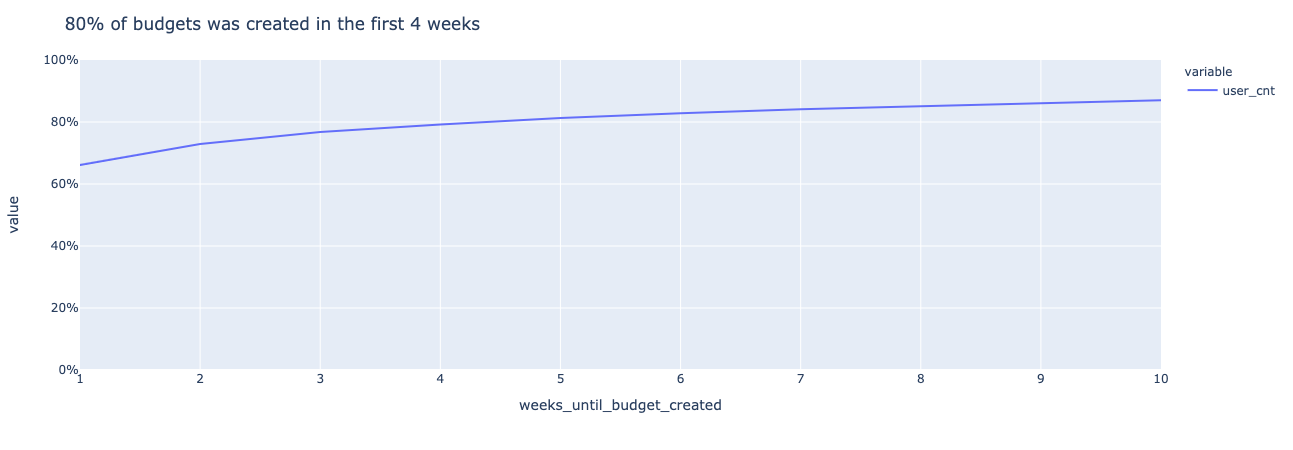

In [287]:
(
    px
    .line(
        budget
        .set_index('weeks_until_budget_created')
        .apply(lambda x: x/x.sum())
        .cumsum()
        .head(10)
    )
    .update_yaxes(tickformat = '%a', range=(0,1))
    .update_layout(title='80% of budgets was created in the first 4 weeks')
)

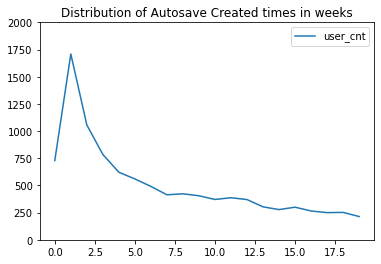

In [280]:
pd.read_sql("""    
    select weeks_until_autosave_created, count(*) as user_cnt
    from (
        select 
              raw_users.id
            , cast(DATE_PART('day', autosave_created_at::timestamp - created_at::timestamp) / 7 as int) + 1 as weeks_until_autosave_created
        from raw_users
        where budget_created_at is not null
    ) t
    group by 1
    order by 1
""", con = engine).head(20).plot(y='user_cnt', ylim = (0, 2000), title = 'Distribution of Autosave Created times in weeks');

In [259]:
autosave = pd.read_sql("""    
    select weeks_until_autosave_created, count(*) as user_cnt
    from (
        select 
              raw_users.id
            , cast(DATE_PART('day', autosave_created_at::timestamp - created_at::timestamp) / 7 as int) + 1 as weeks_until_autosave_created
        from raw_users
        where autosave_created_at is not null
    ) t
    group by 1
    order by 1
""", con = engine)

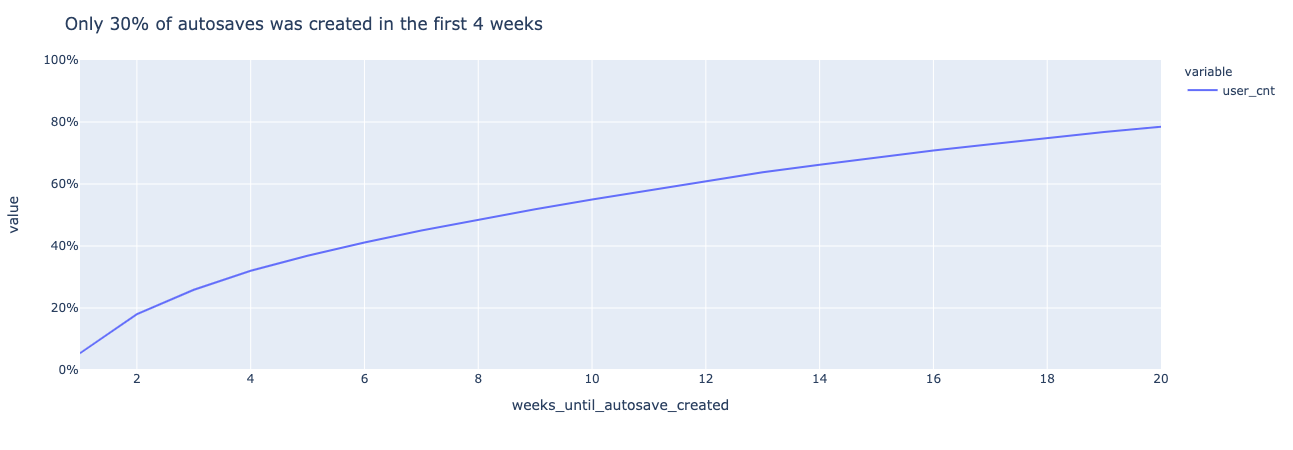

In [286]:
(
    px
    .line(
        autosave
        .set_index('weeks_until_autosave_created')
        .apply(lambda x: x/x.sum())
        .cumsum()
        .head(20)
    )
    .update_yaxes(tickformat = '%a', range=(0,1))
    .update_layout(title='Only 30% of autosaves was created in the first 4 weeks')
)

<AxesSubplot:>

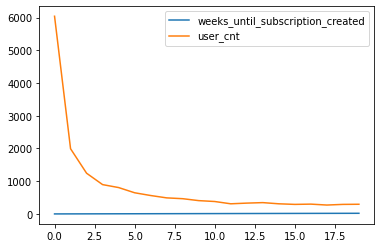

In [200]:
pd.read_sql("""    
    select weeks_until_subscription_created, count(*) as user_cnt
    from (
        select 
              raw_users.id
            , cast(DATE_PART('day', subscription_created_at::timestamp - created_at::timestamp) / 7 as int) + 1 as weeks_until_subscription_created
        from raw_users
        where budget_created_at is not null
    ) t
    group by 1
    order by 1
""", con = engine).head(20).plot()

In [263]:
subscription = pd.read_sql("""    
    select weeks_until_subscription_created, count(*) as user_cnt
    from (
        select 
              raw_users.id
            , cast(DATE_PART('day', subscription_created_at::timestamp - created_at::timestamp) / 7 as int) + 1 as weeks_until_subscription_created
        from raw_users
        where subscription_created_at is not null
    ) t
    group by 1
    order by 1
""", con = engine)

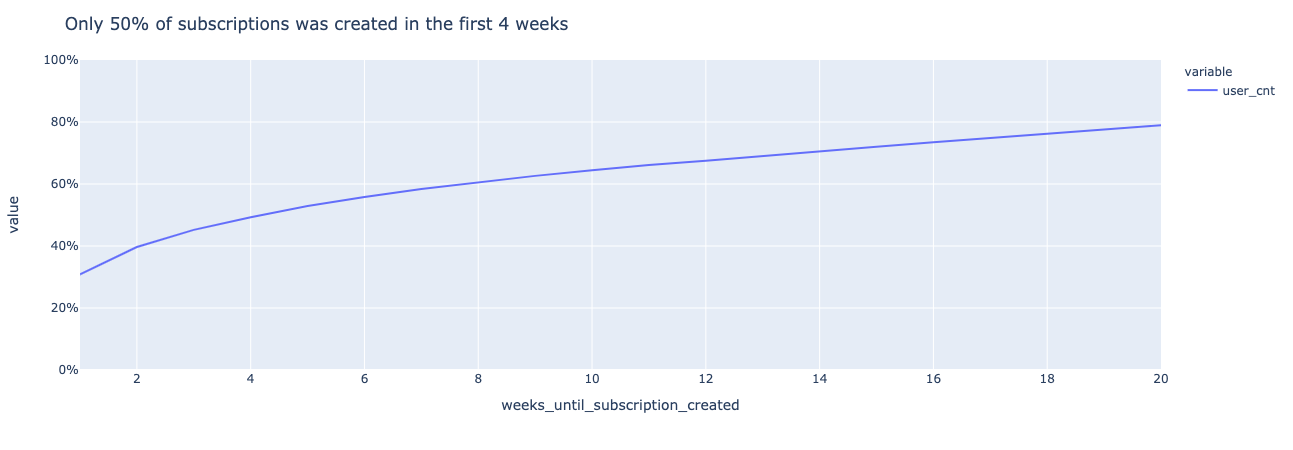

In [285]:
(
    px
    .line(
        subscription
        .set_index('weeks_until_subscription_created')
        .apply(lambda x: x/x.sum())
        .cumsum()
        .head(20)
    )
    .update_yaxes(tickformat = '%a', range=(0,1))
    .update_layout(title='Only 50% of subscriptions was created in the first 4 weeks')
)

# Demographics

In [71]:
ages = pd.read_sql("select user_country as country, age, count(*) as cnt from raw_users group by 1,2", con = engine)

In [80]:
ages_df = (
    ages
    .pivot(index = 'age', columns = 'country', values = 'cnt')
    .apply(lambda x: x / x.sum())
    #.cumsum()
)

In [81]:
ages_df.head()

country,GB,US
age,,
18,0.007394,0.000532
19,0.076326,0.050027
20,0.179518,0.093293
21,0.103603,0.058067
22,0.082611,0.056401


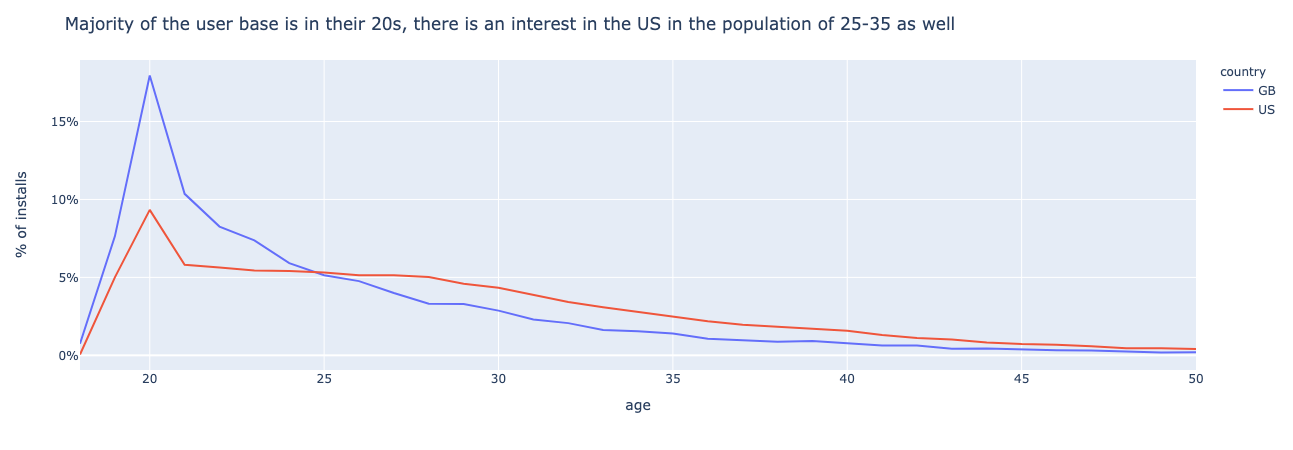

In [274]:
(
    px
    .line(ages_df.query("age <= 50"))
    .update_yaxes(tickformat='%a', title = '% of installs')
    .update_layout(title = 'Majority of the user base is in their 20s, there is an interest in the US in the population of 25-35 as well')
)

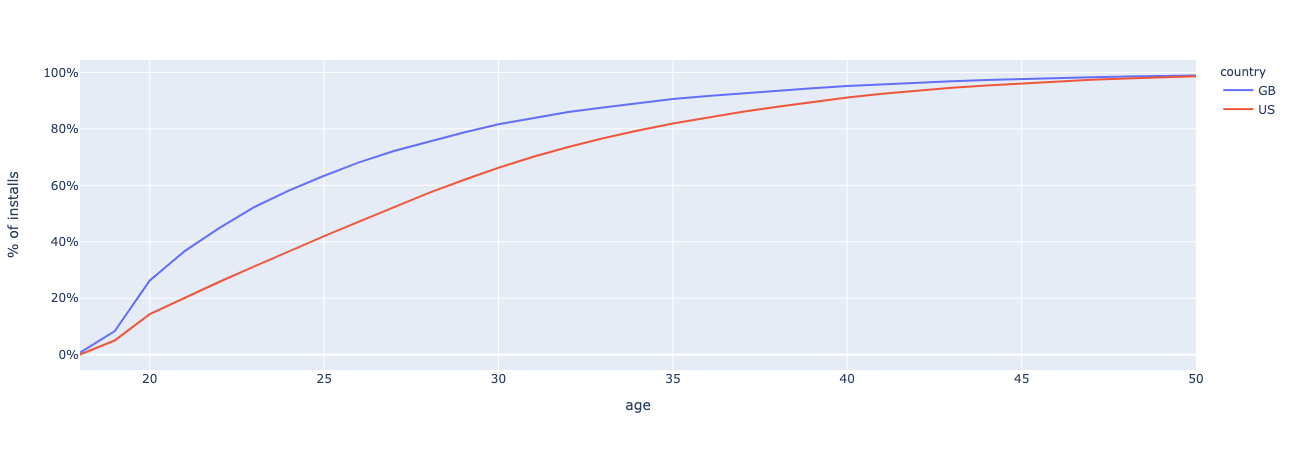

In [87]:
(
    px
    .line(ages_df.query("age <= 50").cumsum())
    .update_yaxes(tickformat='%a', title = '% of installs')
)

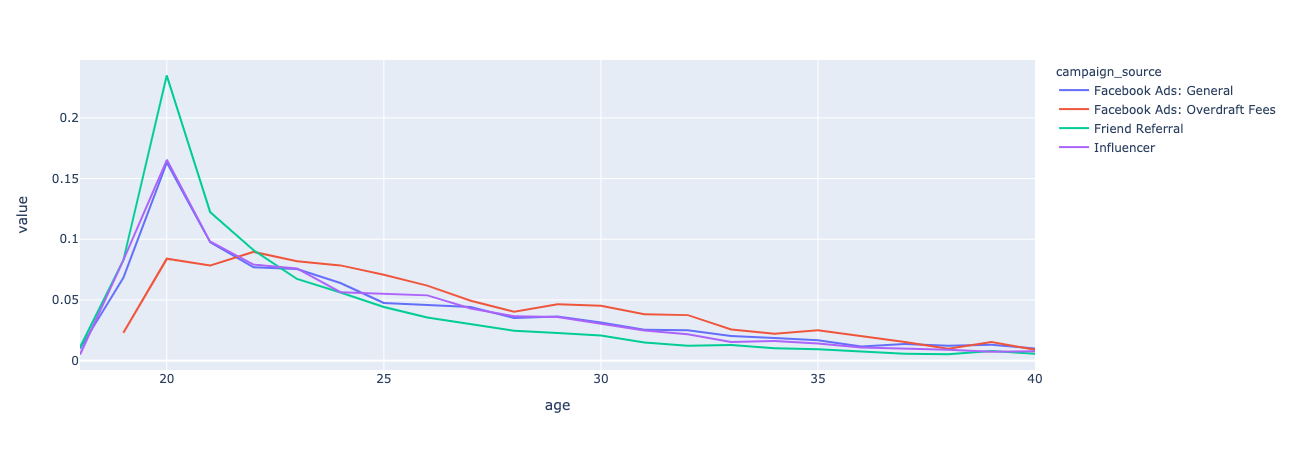

In [98]:
(
    px
    .line(
        pd
        .read_sql("select campaign_source, age, count(*) as cnt from raw_users where user_country = 'GB' group by 1,2", con = engine)
        .pivot(index = 'age', columns = 'campaign_source', values = 'cnt')
        .apply(lambda x: x / x.sum())
        .query("age <= 40")
    )
)
        

# Data quality
how well do the two datasets work together? -> pretty well, data is clean

In [104]:
pd.read_sql("""
    select 
          count(user_ids.id) as user_ids_cnt
        , count(activity_ids.id) as activty_ids_cnt
    from (select distinct id from raw_users) as user_ids
    join (select distinct user_id as id from raw_activity) as activity_ids
        on user_ids.id = activity_ids.id
""", con = engine)

,user_ids_cnt,activty_ids_cnt
0,251817,251817


In [103]:
pd.read_sql("select count(distinct id) from raw_users", con = engine)

,count
0,251817


In [105]:
pd.read_sql("select count(distinct user_id) from raw_activity", con = engine)

,count
0,251817


In [109]:
pd.read_sql("""
    select count(*) as error_cnt
    from raw_users
    join raw_activity
        on raw_users.id = raw_activity.user_id
    where 1=1
        and raw_activity.active_date < raw_users.created_at 
""", con = engine)

,error_cnt
0,0


In [106]:
pd.read_sql("select * from raw_users limit 1", con = engine)

,id,created_at,user_country,age,campaign_source,device,budget_created_at,autosave_created_at,subscription_created_at
0,856843,2019-01-01,GB,50,Influencer,messenger,None,None,2019-03-01


In [107]:
pd.read_sql("select * from raw_activity limit 1", con = engine)

,user_id,active_date
0,855854,2019-01-01


# Retention

In [154]:
pd.read_sql("""
    select 
          count(distinct raw_users.id) as installed_cnt
        , count(distinct raw_activity.user_id) as ret_0d_cnt
    from raw_users
    left outer join raw_activity
        on raw_users.id = raw_activity.user_id
        and raw_activity.active_date = raw_users.created_at
""", con = engine)

,installed_cnt,ret_0d_cnt
0,251817,251813


## 1-day retention

In [117]:
pd.read_sql("""
    select 
          count(distinct raw_users.id) as installed_cnt
        , count(distinct raw_activity.user_id) as ret_1d_cnt
    from raw_users
    left outer join raw_activity
        on raw_users.id = raw_activity.user_id
        and raw_activity.active_date::date = raw_users.created_at::date + INTERVAL '1 day'
""", con = engine)

,installed_cnt,ret_1d_cnt
0,251817,88595


## 7-day retention

In [118]:
pd.read_sql("""
    select 
          count(distinct raw_users.id) as installed_cnt
        , count(distinct raw_activity.user_id) as ret_7d_cnt
    from raw_users
    left outer join raw_activity
        on raw_users.id = raw_activity.user_id
        and raw_activity.active_date::date = raw_users.created_at::date + INTERVAL '7 day'
""", con = engine)

,installed_cnt,ret_7d_cnt
0,251817,48450


## 28-day retention

In [121]:
pd.read_sql("""
    select 
          count(distinct raw_users.id) as installed_cnt
        , count(distinct raw_activity.user_id) as ret_28d_cnt
    from raw_users
    left outer join raw_activity
        on raw_users.id = raw_activity.user_id
        and raw_activity.active_date::date = raw_users.created_at::date + INTERVAL '28 day'
""", con = engine)

,installed_cnt,ret_28d_cnt
0,251817,27055


% of users active in the first week after install

In [123]:
pd.read_sql("""
    select 
          count(distinct raw_users.id) as installed_cnt
        , count(distinct raw_activity.user_id) as ret_7d_cnt
    from raw_users
    left outer join raw_activity
        on raw_users.id = raw_activity.user_id
        and raw_activity.active_date::date between raw_users.created_at::date + INTERVAL '1 day' and raw_users.created_at::date + INTERVAL '7 day'
""", con = engine)

,installed_cnt,ret_7d_cnt
0,251817,169049


% of users active in the second week after install

In [124]:
pd.read_sql("""
    select 
          count(distinct raw_users.id) as installed_cnt
        , count(distinct raw_activity.user_id) as ret_7d_cnt
    from raw_users
    left outer join raw_activity
        on raw_users.id = raw_activity.user_id
        and raw_activity.active_date::date between raw_users.created_at::date + INTERVAL '8 day' and raw_users.created_at::date + INTERVAL '14 day'
""", con = engine)

,installed_cnt,ret_7d_cnt
0,251817,131369


% of users active in the first two weeks after install

In [127]:
campaign_activity = pd.read_sql("""
    select active_days_cnt, campaign_source, count(distinct id) as user_cnt
    from (
        select 
              raw_users.id
            , raw_users.campaign_source
            , count(distinct raw_activity.active_date) as active_days_cnt
        from raw_users
        left outer join raw_activity
            on raw_users.id = raw_activity.user_id
            and raw_activity.active_date::date between raw_users.created_at::date + INTERVAL '0 day' and raw_users.created_at::date + INTERVAL '7 day'
        group by 1,2
    ) t
    group by 1,2
""", con = engine)

,active_days_cnt,campaign_source,user_cnt
0,1,Facebook Ads: General,7282
1,1,Facebook Ads: Overdraft Fees,24308
2,1,Friend Referral,8662
3,1,Influencer,42519
4,2,Facebook Ads: General,6257
5,2,Facebook Ads: Overdraft Fees,17856
6,2,Friend Referral,6705
7,2,Influencer,28508
8,3,Facebook Ads: General,4770
9,3,Facebook Ads: Overdraft Fees,10523


In [135]:
campaign_activity_norm = (
    campaign_activity
    .pivot(index = 'active_days_cnt', columns = 'campaign_source', values = 'user_cnt')
    .apply(lambda x: x/x.sum())
)

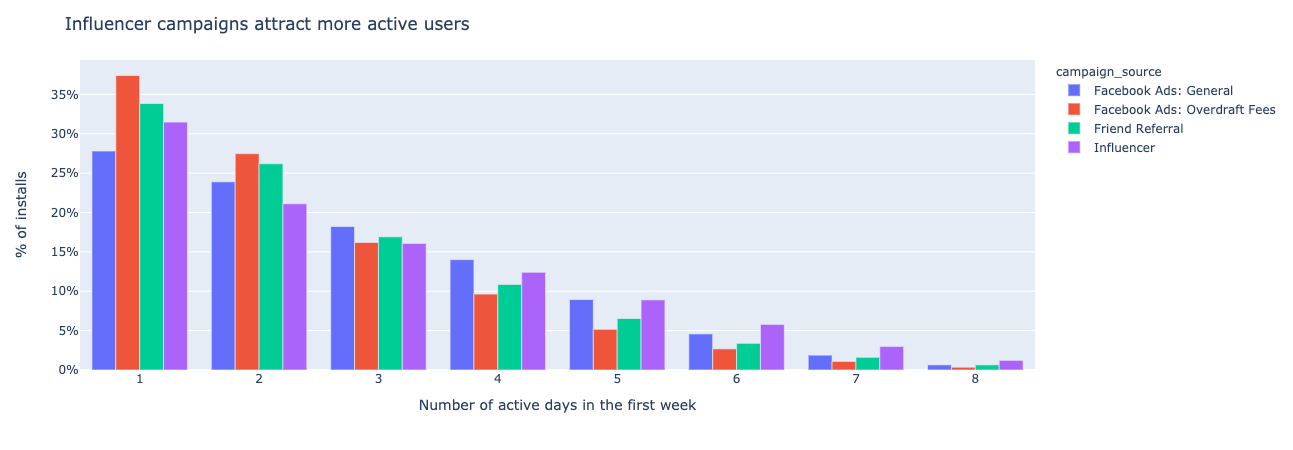

In [139]:
(
    px
    .bar(campaign_activity_norm, barmode = 'group')
    .update_yaxes(tickformat='%a', title = '% of installs')
    .update_xaxes(title = 'Number of active days in the first week')
    .update_layout(title = 'Influencer campaigns attract more active users')
)

In [140]:
campaign_activity_w2 = pd.read_sql("""
    select active_days_cnt, campaign_source, count(distinct id) as user_cnt
    from (
        select 
              raw_users.id
            , raw_users.campaign_source
            , count(distinct raw_activity.active_date) as active_days_cnt
        from raw_users
        left outer join raw_activity
            on raw_users.id = raw_activity.user_id
            and raw_activity.active_date::date between raw_users.created_at::date + INTERVAL '8 day' and raw_users.created_at::date + INTERVAL '15 day'
        group by 1,2
    ) t
    group by 1,2
""", con = engine)

In [141]:
campaign_activity_norm_w2 = (
    campaign_activity_w2
    .pivot(index = 'active_days_cnt', columns = 'campaign_source', values = 'user_cnt')
    .apply(lambda x: x/x.sum())
)

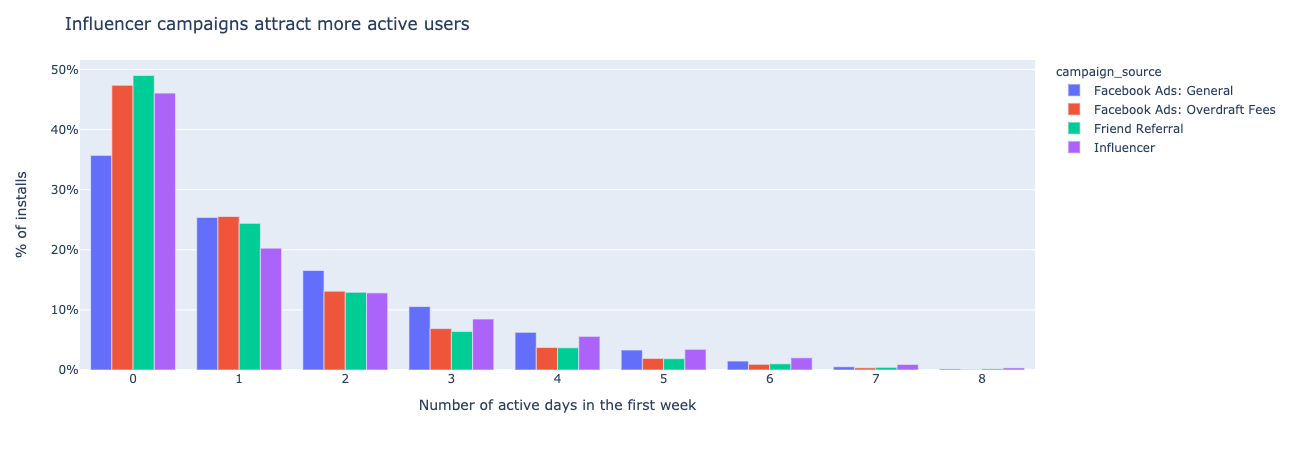

In [142]:
(
    px
    .bar(campaign_activity_norm_w2, barmode = 'group')
    .update_yaxes(tickformat='%a', title = '% of installs')
    .update_xaxes(title = 'Number of active days in the first week')
    .update_layout(title = 'Influencer campaigns attract more active users')
)

## First days after install

In [166]:
days_after_install = pd.read_sql("""
    select days_after_install, count(distinct id) as user_cnt
    from (
        select 
              raw_users.id
            , cast(DATE_PART('day', raw_activity.active_date::timestamp - raw_users.created_at::timestamp) as int) as days_after_install
        from raw_users
        left outer join raw_activity
            on raw_users.id = raw_activity.user_id
            and raw_activity.active_date::date between raw_users.created_at::date + INTERVAL '0 day' and raw_users.created_at::date + INTERVAL '15 day'
        group by 1,2
    ) t
    group by 1
    order by 1
""", con = engine)

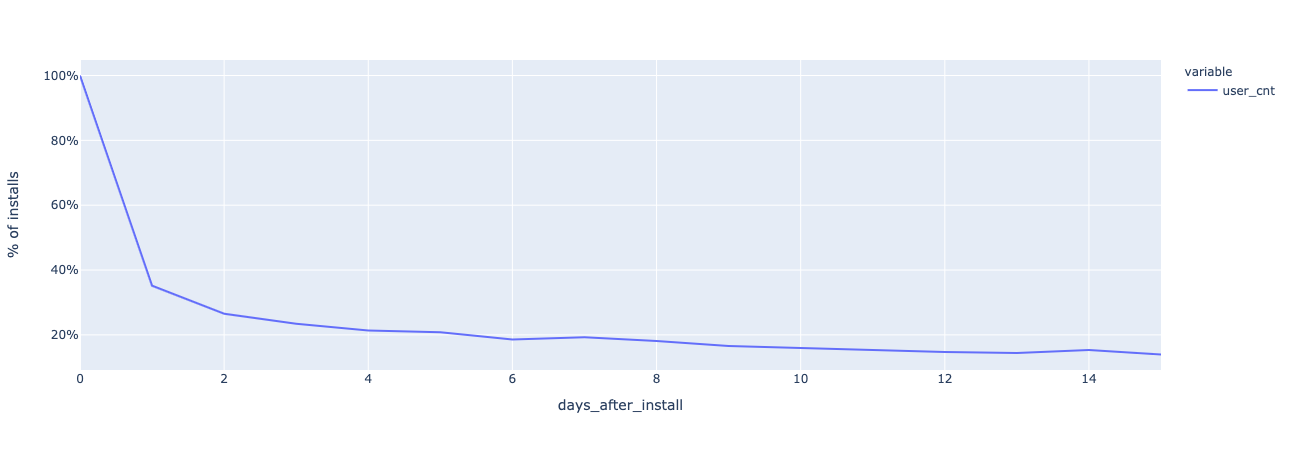

In [178]:
(
    px
    .line(days_after_install.set_index('days_after_install').apply(lambda x: x.div(x.iloc[0])))
    .update_yaxes(tickformat='%a', title = '% of installs')
)

In [179]:
days_after_install_camp = pd.read_sql("""
    select days_after_install, campaign_source, count(distinct id) as user_cnt
    from (
        select 
              raw_users.id
            , raw_users.campaign_source
            , cast(DATE_PART('day', raw_activity.active_date::timestamp - raw_users.created_at::timestamp) as int) as days_after_install
        from raw_users
        left outer join raw_activity
            on raw_users.id = raw_activity.user_id
            and raw_activity.active_date::date between raw_users.created_at::date + INTERVAL '0 day' and raw_users.created_at::date + INTERVAL '15 day'
        group by 1,2,3
    ) t
    group by 1,2
""", con = engine)

In [181]:
(
    days_after_install_camp
    .pivot(index='days_after_install', columns='campaign_source', values='user_cnt')
    .apply(lambda x: x.div(x.iloc[0]))
)

campaign_source,Facebook Ads: General,Facebook Ads: Overdraft Fees,Friend Referral,Influencer
days_after_install,,,,
0,1.000000,1.000000,1.000000,1.000000
1,0.347527,0.274890,0.349232,0.390180
2,0.281421,0.204425,0.245322,0.295116
3,0.245255,0.186547,0.207821,0.259636
4,0.227917,0.166931,0.189578,0.237753
5,0.233951,0.171869,0.179109,0.226156
6,0.209242,0.150392,0.155358,0.203821
7,0.224136,0.163869,0.173093,0.203651
8,0.216498,0.156407,0.155475,0.191262


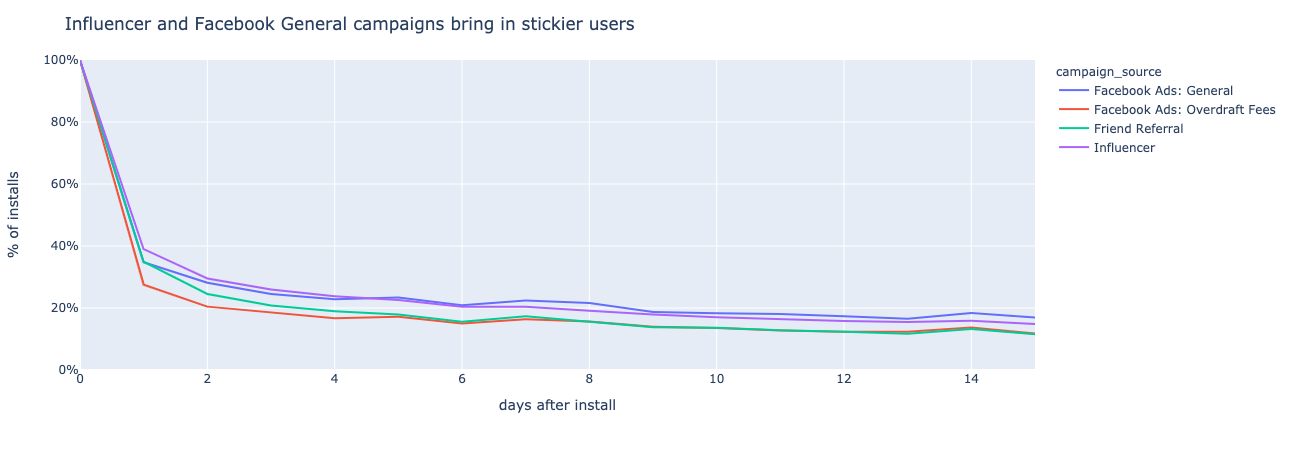

In [230]:
(
    px
    .line(
        days_after_install_camp
        .pivot(index='days_after_install', columns='campaign_source', values='user_cnt')
        .apply(lambda x: x.div(x.iloc[0]))
    )
    .update_yaxes(tickformat='%a', title = '% of installs', range=(0,1))
    .update_xaxes(title = 'days after install')
    .update_layout(title='Influencer and Facebook General campaigns bring in stickier users')
)